In [2]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

# Numerical Integration

The typical type of numerical integration calculates areas by approximating areas of rectangles with certain widths and heights.

<b><i>So, how can this visual idea be expressed mathematical</b></i>

Taking $f(x_i)$ to be heights and $w_i$ to be widths (or weights), the form of an integral becaomes

\begin{equation}
    \int_a^b f(x)dx \simeq \sum_{i=1}^{N} f(x_i)w_i
\end{equation}

This equation will be referred to as the <i>standard form</i> for all integration. All the types of algorithms that get used amount to choosing the $x_i$ points and attributing certain weights $w_i$.

#### Trapezoid and Simposons Rule

These rules use $N-1$ boxes of equal width $h$ throughout the region $[a,b]$

\begin{equation}
    x_i = a +ih, \quad h = \frac{b-a}{N-1}, \quad i=0,...,N-1
\end{equation}

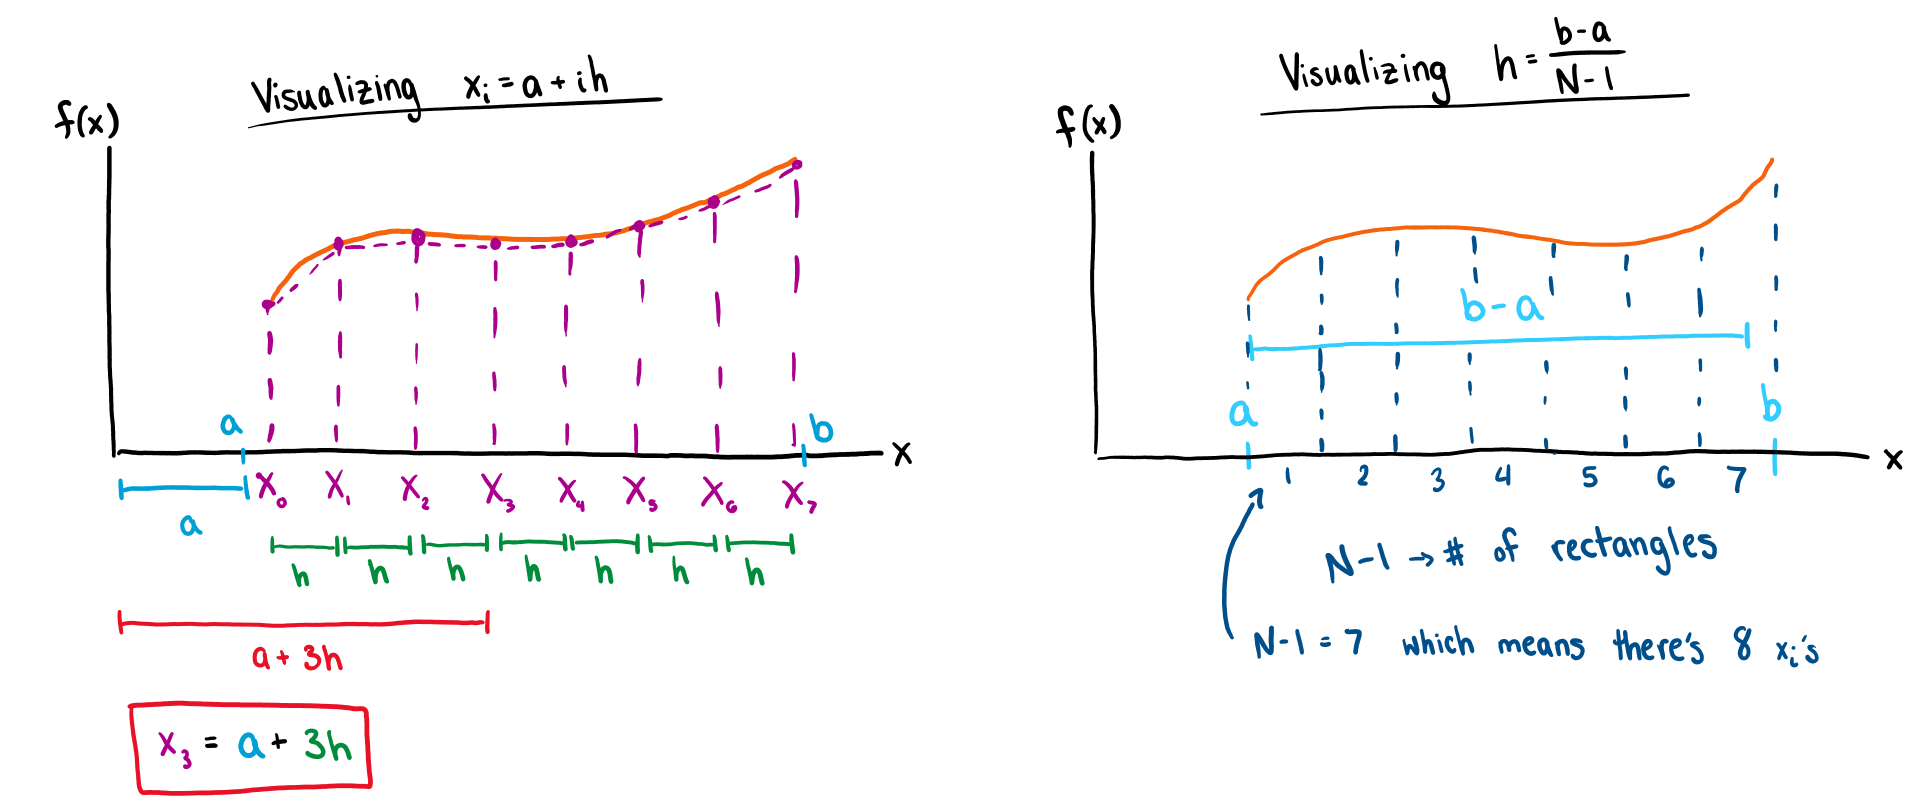

In [3]:
display.Image('visualize1.png')

For the <i>trapezoidal rule</i>, the rule assumes a width of $h$ as mentioned above and a height of $(f_i + f_{i+1})/2$ (<i>image the height this as the average of the sides of the trapezoid</i>). Adding all these contributions together using the <i>standard form</i> gives:

\begin{align*}
    \sum_{i=0}^{N-1} f(x_i)w(x_i) &= \sum_{i=0}^{N-1} h\frac{(f_i+f_{i+1})}{2} \\
    &= h\frac{(f_0+f_1)}{2} + h\frac{(f_1+f_2)}{2} + ... + h\frac{(f_{N-2}+f_{N-1})}{2} \\
    &= \frac{h}{2}f_0 + hf_1 + hf_2 + ... + hf_{N-2} + \frac{h}{2}f_{N-1}
\end{align*}

The coefficients for the boundary points ($x_1$ and $x_N$) are different than the inside terms because each side on the inside gets counted as the left side of one trapeziod and the right side of another.

Therefore, the trapezoid rule can be uniquley defined as:
\begin{equation*}
    w_i = \left\{\frac{h}{2},h,..., h, \frac{h}{2} \right\} \quad \text{(Trapezoid Rule)}
\end{equation*}

In [88]:
def g(x):
    return np.sin(7*x)*x**2

def trapezoid(f:'function', n:'int', a:'float', b:'float') -> 'float':
    """
    Integrates a function f with the trapezoid rule. Note that the step size h depends upon the size of interval.

    Parameters
    ----------
    f: function
        the function to be integrated
    n: int
        numbers of boxes used to perform the integration
    a: float
        Lower bound of the integration
    b: float
        Upper bound of the integration
    
    Returns
    -------
    Ans: float
        The desired integral value of the function within the specified region of integration
    """
    # Initialize the widths being used
    h = (b-a)/(n) #notice that n = N-1

    #Adds the boundary terms  to the sums
    sum = (f(a)+f(b))/2

    #Sums the inner terms of the standard from for Trapezoidal rule
    for i in range(1, n):
        sum += f(a+i*h)
    
    #Multiply by the common factor of h (the weight)
    Ans = h*sum

    return Ans

A = 0
B = 1
N = 100 # This is really the N-1 (number of boxes) in the mathematical expressions above

print(trapezoid(g, N, A, B))

-0.08226458096047859


For the <i>Simpson's Rule</i>, it attempts to fit a parabola to 3 successive heights given by the function. The actual calculation of the weights is much more complicated than it sounds, but the algorithm ends up becoming:

\begin{equation*}
    \sum_{i=0}^{N-1}f(x_i)w_i = \frac{h}{3}f_0 + \frac{4h}{3}f_1 + \frac{2h}{3}f_2+\frac{4h}{3}f_3 + ... + \frac{4h}{3}f_{N-1} +\frac{h}{3}f_{N-1}
\end{equation*}

In terms of the <i>standard form</i>,
\begin{equation*}
    w_i = \left\{\frac{h}{3}, \frac{4h}{3}, \frac{2h}{3}, \frac{4h}{3}, ...\frac{4h}{3}, \frac{h}{3}\right\} \quad \text{(Simpson's Rule)}
\end{equation*}

Here's a link to a visualization of the process being completed:
 https://www.desmos.com/calculator/idzt99y8eh

Since the parabolas are found using three points, the number of integration points N must be odd! (making the number of boxes N-1 even)

In [92]:
def simpsons(f:'function', n:'int', a:'float', b:'float')->'float':
    """
    Integrates a function f with the trapezoid rule. Note that the step size h depends upon the size of interval

    Also, N must be even!

    Parameters
    ----------
    f: function
        the function to be integrated
    n: int
        numbers of boxes used to perform the integration
    a: float
        Lower bound of the integration
    b: float
        Upper bound of the integration
    
    Returns
    -------
    Ans: float
        The desired integral value of the function within the specified region of integration
    """

    #Check if the number of boxes is even/if the number of intergration points is odd
    if n%2 != 0:
        print("The number of boxes is not even")
        return

    # Initialize the widths being used
    h = (b-a)/(n) #notice that n = N-1

    #Adds the boundary terms to the sums
    sum = f(a)+f(b)

    #Sums the inner terms of the standard form for Simpsons rule
    for i in range(1, n):
        k = a+i*h
        if i%2 == 0: #If i is even
            sum += 2*f(k)
        else:
            sum += 4*f(k)
    
    return (h/3)*sum

A = 0
B = 1
boxes = 100 # This is really the N-1 (number of boxes) in the mathematical expressions above. Must be even!

print(simpsons(g, boxes, A, B))

-0.08231954047836068


These integration methods have these respective amounts of error:

\begin{equation*}
    \mathcal{E}_t = \mathcal{O}\left(\frac{(b-a)^3}{N^2}\right) \frac{d^2f}{dx^2}, \qquad \mathcal{E}_s = \mathcal{O}\left(\frac{(b-a)^5}{N^4}\right) \frac{d^4f}{dx^4}
\end{equation*}

### Gaussian Quadrature

Guass-Legendre Quadrature approximates the definite integral of a function normally of the form

\begin{equation}
    \int_{-1}^{1} f(x)dx \approx \sum_{i=1}^{n} w_i f(x_i)
\end{equation}

To solve this, the $x_i's$ must be the N zeros of the Legendre polynomial of degree $N$ and the weights related to the derivatives of that polynomial

\begin{equation*}
    P_N(x_i) = 0, \qquad w_i = \frac{2}{(1-x_i^2)(P'_N(x_i))^2}
\end{equation*}

<b><i>What is a Legendre Polynomial?</b></i>

Legendre polynomials are complete, orthogonal polynomials in the interval $[-1, 1]$. If $P_n(x)$ is a polynomial of degree $n$, then it must satisfy the condition

\begin{equation*}
    \int_{-1}^{1} P_m(x)P_n(x) = \frac{2}{2n+1}\delta_{mn} \quad \text{ if } n \neq m
\end{equation*}

The condition $P_n(1)=1$ also is a standard condition of the polynomials. This condition fixes the normalization of the polynomials and the completeness follows from the completeness of the $1, x, x^2, x^3, ...$ basis of powers.

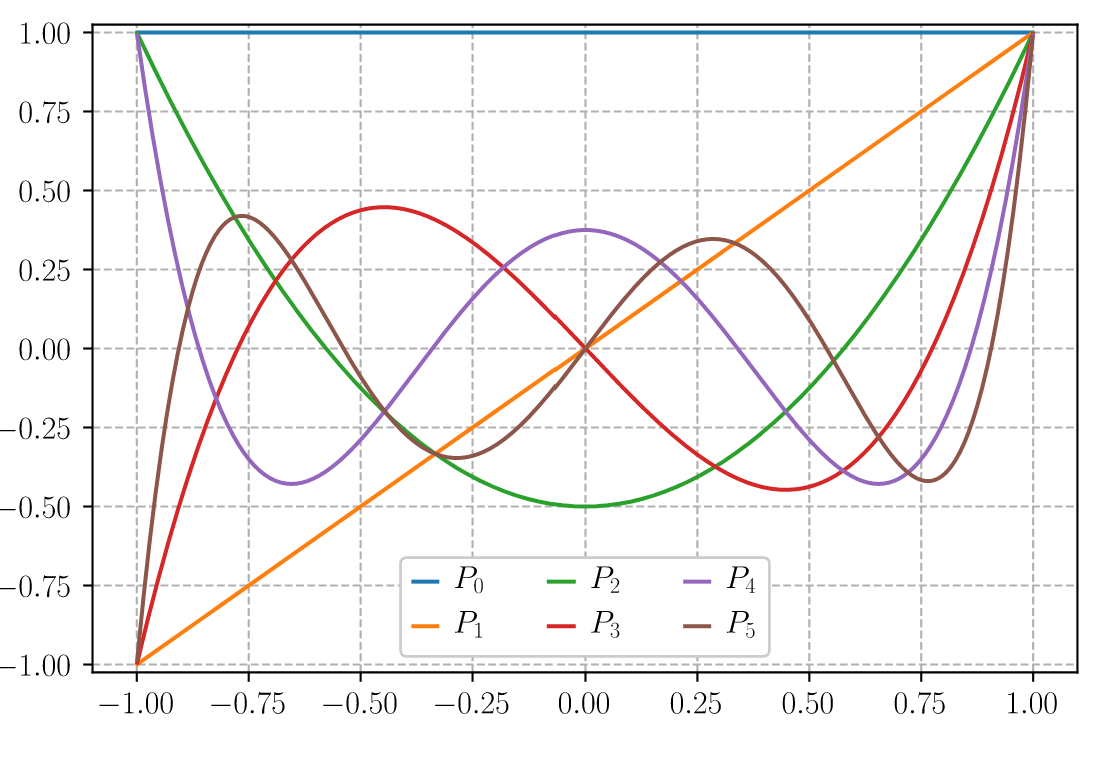

In [58]:
display.Image("Legendrepolynomials6.png")

<b><i>How can the polynomials be used for Gauss-Legrendre quadrature?</i></b>

Well, the nitty gritty of the code I'm still pretty confused about. However, I do understand that the <i>standard form</i> uses the roots of the n-order Legrendre polynomials as the integration points and the weights defined by that derivative formula. Also, I know there is a scaling done on the integration points and the weight to be able to use any bounds for the integral  (not just $[-1,1]$).

In [97]:
# Find the roots of the n-order Legendre polynomial and the weights assocaited with the derivative formula

from numpy import ndarray, zeros, pi, cos

def GaussPoints (Npts:'int', a:'float', b:'float', x:'ndarray', w:'ndarray', eps : 'float')->None:
    """
    Generates points and weights for Gaussian quadrature

    Parameters
    ----------
    Npts: int
        Number of points used in the integration. It's associated with the degree of the Legendre polynomial

    a: float
        Lower bound of the integration

    b: float
        Upper bound of the integration

    x: numpy array
        Array of integration points that will be filled with the roots of the N-order Legendre polynomial
    
    w: numpy array
        Array of integration points that will be filled with the weights found using the derivative formula of the Legendre polynomial

    eps: float
        The precision to use when calculating the points

    Returns
    -------
    None
    """

    m = 0 ; i = 0 ; j = 0 ; t = 0 ; t1 = 0; pp = 0
    p1 = 0 ; p2 = 0 ; p3 = 0
    m = int ((Npts+1)/2)


    for i in range (1, m+1):
        t = cos(pi*(float(i)-0.25)/(float(Npts)+0.5))
        t1 = 1

        while((abs(t-t1)) >= eps):
            p1 = 1 ; p2 = 0
            
            for j in range(1, Npts + 1):
                p3 = p2 ; p2 = p1
                p1 = ((2*float(j)-1)*t*p2 - (float(j)-1)*p3)/(float(j))
                      
            pp = Npts*(t*p1-p2)/(t*t-1)
            t1 = t
            t = t1-p1/pp

        x [i-1] = -t
        x [Npts-i] = t
        w [i-1] = 2/((1-t*t)*pp*pp)
        w [Npts-i] = w [i-1]
                          
    for j in range(0, Npts) : #Scale [-1,1] to [a,b]
        x[j] = x[j]*(b-a)/2 + (b+a)/2
        w[j] = w[j]*(b-a)/2

def gaussQuad(f:'function', N:'int', a:'float', b:'float', eps:'float')->'float':
    """
    Gaussian quadrature using points and weights generated by GaussPoints with precision eps

    Parameters
    ----------
    f: function
        The function to be integrated
    N: int
        Number of integration points
    a: float
        Lower bound of the integration
    b: float
        Upper bound of the integration
    eps: float
        The precision of the Gaussian Quadrature calculation

    Returns
    --------
    Ans: float
        The desired integral value of the function within the specified region of integration
    """

    x = zeros(N) ; w = zeros(N) #Initalizes the arrays for the integration points and the weights

    GaussPoints(N, a, b, x, w, eps) #Calls the GaussPoint func to populate the arrays with the needs integration points and weights

    Ans = 0
    for i in range(0,N):
        Ans += f(x[i])*w[i] #Sums all the function values and weights from the standard from

    return Ans

In [99]:
def g(x): return np.exp(x)

gaussQuad(g, 10, 0, 1, 3E-14)

1.7182818284590295